In [1]:
import pensieve

This adds a "render()" method to display the graph, assuming you have Graphviz  

In [2]:
g = pensieve.ComputationGraph(echo=True, node_style=pensieve.NodeStyle(shape='egg', colour='lightblue', text_colour='grey'))

In [3]:
g.add('one', parents=[], function=lambda: 1, on_disk=True, node_style=pensieve.NodeStyle(colour='red', text_colour='red'))

CG Creating node 'one'
HM save:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----
GN Evaluating 'one'
HM save:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----
HM load:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----


In [4]:
g._nodes['one']._value

In [5]:
g['one']

HM load:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----


1

In [6]:
g.add('three', parents=[], function=lambda: 3)
g.add('sum', parents=['one', 'three'], function=lambda x: x['one'] + x['three']) 
g.add('sum_plus_one oval', parents=['sum'], function=lambda x: x + 1)
g.add('sum_plus_one ellipse', parents=['sum'], function=lambda x: x + 1)
g.add('tuple', parents=['sum_plus_one oval', 'one'], function=lambda x: x['sum_plus_one oval'] + x['one'])

CG Creating node 'three'
GN Evaluating 'three'
CG Creating node 'sum'
HM load:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----
GN Evaluating 'sum'
CG Creating node 'sum_plus_one oval'
GN Evaluating 'sum_plus_one oval'
CG Creating node 'sum_plus_one ellipse'
GN Evaluating 'sum_plus_one ellipse'
CG Creating node 'tuple'
HM load:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----
GN Evaluating 'tuple'


In [7]:
g.graphviz_str()

'strict digraph G { \n\t{\n \t\t"one" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]\n\t\t"three" [fontsize=8 shape=egg style=filled color=lightblue fontcolor=grey fillcolor=gray95 fontname=helvetica]\n\t\t"sum" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]\n\t\t"sum plus one oval" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]\n\t\t"sum plus one ellipse" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]\n\t\t"tuple" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]\n\t}\n\t"one" -> "sum" [color=grey60 arrowsize=0.5]\n"three" -> "sum" [color=grey60 arrowsize=0.5]\n\t"sum" -> "sum plus one oval" [color=grey60 arrowsize=0.5]\n\t"sum" -> "sum plus one ellipse" [color=grey60 arrowsize=0.5]\n\t"sum plus one oval" -> "tuple" [color=grey60 arrowsize=0.5]\n"

In [8]:
g['sum']

4

In [9]:
print(g.graphviz_str())

strict digraph G { 
	{
 		"one" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]
		"three" [fontsize=8 shape=egg style=filled color=lightblue fontcolor=grey fillcolor=gray95 fontname=helvetica]
		"sum" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]
		"sum plus one oval" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]
		"sum plus one ellipse" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]
		"tuple" [fontsize=8 shape=egg style=filled color=red fontcolor=red fillcolor=gray95 fontname=helvetica]
	}
	"one" -> "sum" [color=grey60 arrowsize=0.5]
"three" -> "sum" [color=grey60 arrowsize=0.5]
	"sum" -> "sum plus one oval" [color=grey60 arrowsize=0.5]
	"sum" -> "sum plus one ellipse" [color=grey60 arrowsize=0.5]
	"sum plus one oval" -> "tuple" [color=grey60 arrowsize=0.5]
"one" -> "tuple" [color=grey60 arr

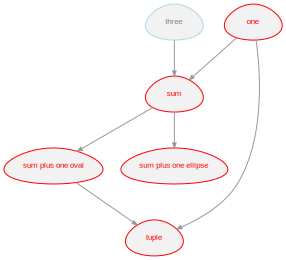

In [10]:
g.render()

In [11]:
g._child_names['one']

['sum', 'tuple']

In [12]:
g.get_children('one')

[ComputationGraphNode:sum, ComputationGraphNode:tuple]

In [13]:
g.add('sum', parents=['one', 'three'], function=lambda x: x['one'] + x['three'])

GN Updating 'sum'
HM load:one key:B5M9O0D0P17OM0TNEJ5MQH4I3UVSRS21J5NICDNTPGSCADRN6DM0----
GN Evaluating 'sum'


In [14]:
g.add('one', parents=[], function=lambda: 1, on_disk=True, node_style=pensieve.NodeStyle(colour='blue', text_colour='blue'), safe_update=False)

TypeError: add() got an unexpected keyword argument 'safe_update'

In [ ]:
from copy import deepcopy

In [ ]:
y = deepcopy(g)

In [ ]:
y.render()

In [ ]:
from gringotts import Pickler

In [ ]:
Pickler.save(obj=g, path='graph.pickle')

In [ ]:
g2 = Pickler.load(path='graph.pickle')

In [ ]:
g2.render()

In [ ]:
g2['tuple']

In [ ]:
g2.render()

In [ ]:
id(g)

In [ ]:
id(y)

In [ ]:
g.add('five', parents=[], function=lambda: 5)

In [ ]:
g.render()

In [ ]:
y.render()

In [ ]:
print(g)

In [ ]:
g.render()

In [ ]:
g['sum_plus_one']

In [ ]:
g.render()

In [ ]:
from gringotts import HardMemory